In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM,GRU
from keras.layers import Dense, Dropout
import seaborn as sns

In [3]:
df = pd.read_csv("Bert_9year_1-2week_weighted.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Date,bert_scores,Open,High,Low,Close,Adj Close,Volume,windowSize_2,windowSize_3,week_1,week_2,2day_weighted,3day_weighted,1week_weighted,2week_Weighted
0,0,2023,2012-08-07,0.500000,5295.399902,5350.100098,5281.649902,5336.700195,5336.700195,0.0,0.416667,0.277778,0.075680,0.079561,0.166667,0.166660,0.500000,0.500000
1,1,2022,2012-08-08,0.333333,5345.250000,5377.600098,5331.049805,5338.000000,5338.000000,0.0,0.166667,-0.031746,0.056200,0.022418,0.385000,0.250000,0.333333,0.333333
2,2,2021,2012-08-09,0.000000,5348.299805,5368.200195,5312.100098,5322.950195,5322.950195,0.0,-0.214286,-0.190476,0.062152,0.012894,0.110000,0.216667,0.000000,0.000000
3,3,2020,2012-08-10,-0.428571,5308.200195,5330.100098,5294.100098,5320.399902,5320.399902,0.0,-0.285714,-0.148810,0.033581,0.005751,-0.282857,-0.126190,-0.428571,-0.428571
4,4,2019,2012-08-13,-0.142857,5316.350098,5352.450195,5309.049805,5347.899902,5347.899902,0.0,-0.008929,0.041667,0.166234,0.042857,-0.235714,-0.214286,-0.142857,-0.142857


In [4]:
df = df.dropna(how='any',axis=0)

In [5]:
df.reset_index(drop=True)

,Unnamed: 0,Unnamed: 0.1,Date,bert_scores,Open,High,Low,Close,Adj Close,Volume,windowSize_2,windowSize_3,week_1,week_2,2day_weighted,3day_weighted,1week_weighted,2week_Weighted
0,0,2023,2012-08-07,0.500000,5295.399902,5350.100098,5281.649902,5336.700195,5336.700195,0.0,0.416667,0.277778,0.075680,0.079561,0.166667,0.166660,0.500000,0.500000
1,1,2022,2012-08-08,0.333333,5345.250000,5377.600098,5331.049805,5338.000000,5338.000000,0.0,0.166667,-0.031746,0.056200,0.022418,0.385000,0.250000,0.333333,0.333333
2,2,2021,2012-08-09,0.000000,5348.299805,5368.200195,5312.100098,5322.950195,5322.950195,0.0,-0.214286,-0.190476,0.062152,0.012894,0.110000,0.216667,0.000000,0.000000
3,3,2020,2012-08-10,-0.428571,5308.200195,5330.100098,5294.100098,5320.399902,5320.399902,0.0,-0.285714,-0.148810,0.033581,0.005751,-0.282857,-0.126190,-0.428571,-0.428571
4,4,2019,2012-08-13,-0.142857,5316.350098,5352.450195,5309.049805,5347.899902,5347.899902,0.0,-0.008929,0.041667,0.166234,0.042857,-0.235714,-0.214286,-0.142857,-0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,2019,4,2021-04-09,0.142857,14882.650391,14918.450195,14785.650391,14834.849609,14834.849609,504100.0,0.029762,0.093915,0.142857,0.142857,0.188571,0.214286,0.269246,0.635159
2006,2020,3,2021-04-12,-0.083333,14644.650391,14652.500000,14248.700195,14310.799805,14310.799805,650200.0,0.069444,0.129630,-0.083333,-0.083333,-0.007857,0.069643,0.360317,0.543492
2007,2021,2,2021-04-13,0.222222,14364.900391,14528.900391,14274.900391,14504.799805,14504.799805,605100.0,0.236111,0.212963,0.222222,0.222222,0.119167,0.099405,0.105952,0.547937
2008,2022,1,2021-04-15,0.250000,14522.400391,14597.549805,14353.200195,14581.450195,14581.450195,568000.0,0.208333,0.250000,0.250000,0.250000,0.238333,0.173611,0.336111,0.597937


In [6]:
print("Nulls in training dataset",df.isnull().sum())

Nulls in training dataset Unnamed: 0        0
Unnamed: 0.1      0
Date              0
bert_scores       0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
windowSize_2      0
windowSize_3      0
week_1            0
week_2            0
2day_weighted     0
3day_weighted     0
1week_weighted    0
2week_Weighted    0
dtype: int64


In [7]:
train_dates = pd.to_datetime(df['Date'])
train_dates.reset_index(drop=True)
train_dates

0      2012-08-07
1      2012-08-08
2      2012-08-09
3      2012-08-10
4      2012-08-13
          ...    
2019   2021-04-09
2020   2021-04-12
2021   2021-04-13
2022   2021-04-15
2023   2021-04-16
Name: Date, Length: 2010, dtype: datetime64[ns]

In [8]:
date_test = df['Date']>'2021-02-01'
df_test = df.loc[date_test]
df_test

,Unnamed: 0,Unnamed: 0.1,Date,bert_scores,Open,High,Low,Close,Adj Close,Volume,windowSize_2,windowSize_3,week_1,week_2,2day_weighted,3day_weighted,1week_weighted,2week_Weighted
1974,1974,49,2021-02-02,0.500000,14481.099609,14731.700195,14469.150391,14647.849609,14647.849609,915000.0,0.500000,0.444444,0.424603,0.297117,0.447857,0.430000,0.089960,0.345415
1975,1975,48,2021-02-03,0.500000,14754.900391,14868.849609,14574.150391,14789.950195,14789.950195,869500.0,0.416667,0.388889,0.414399,0.230790,0.495000,0.471429,0.264960,0.368492
1976,1976,47,2021-02-04,0.333333,14789.049805,14913.700195,14714.750000,14895.650391,14895.650391,884700.0,0.333333,0.407407,0.374717,0.206981,0.385000,0.425000,0.296349,0.463730
1977,1977,46,2021-02-05,0.333333,14952.599609,15014.650391,14864.750000,14924.250000,14924.250000,935600.0,0.444444,0.462963,0.366059,0.193375,0.330000,0.366667,0.375714,0.530397
1978,1978,45,2021-02-08,0.555556,15064.299805,15159.900391,15041.049805,15115.799805,15115.799805,671200.0,0.527778,0.435185,0.354154,0.183851,0.476667,0.433333,0.616270,0.616508
1979,1979,44,2021-02-09,0.500000,15164.150391,15257.099609,15064.299805,15109.299805,15109.299805,713300.0,0.375000,0.392857,0.258916,0.129883,0.513333,0.486111,0.614683,0.641508
1980,1980,43,2021-02-10,0.250000,15119.049805,15168.250000,14977.200195,15106.500000,15106.500000,624800.0,0.339286,0.300265,0.205344,0.117978,0.330000,0.398611,0.629167,0.641508
1981,1981,42,2021-02-11,0.428571,15073.250000,15188.500000,15065.400391,15173.299805,15173.299805,500100.0,0.325397,0.307840,0.169630,0.119602,0.365357,0.380357,0.632143,0.727222
1982,1982,41,2021-02-12,0.222222,15186.200195,15243.500000,15081.000000,15163.299805,15163.299805,571800.0,0.247475,0.248316,0.047181,0.119602,0.288095,0.300000,0.509325,0.828810
1983,1983,40,2021-02-15,0.272727,15270.299805,15340.150391,15243.400391,15314.700195,15314.700195,456000.0,0.261364,0.137205,0.039244,0.094800,0.253333,0.286219,0.486634,0.908355


In [9]:
date_train = df['Date']<'2021-02-01'
df = df.loc[date_train]
df

,Unnamed: 0,Unnamed: 0.1,Date,bert_scores,Open,High,Low,Close,Adj Close,Volume,windowSize_2,windowSize_3,week_1,week_2,2day_weighted,3day_weighted,1week_weighted,2week_Weighted
0,0,2023,2012-08-07,0.500000,5295.399902,5350.100098,5281.649902,5336.700195,5336.700195,0.0,0.416667,0.277778,0.075680,0.079561,0.166667,0.166660,0.500000,0.500000
1,1,2022,2012-08-08,0.333333,5345.250000,5377.600098,5331.049805,5338.000000,5338.000000,0.0,0.166667,-0.031746,0.056200,0.022418,0.385000,0.250000,0.333333,0.333333
2,2,2021,2012-08-09,0.000000,5348.299805,5368.200195,5312.100098,5322.950195,5322.950195,0.0,-0.214286,-0.190476,0.062152,0.012894,0.110000,0.216667,0.000000,0.000000
3,3,2020,2012-08-10,-0.428571,5308.200195,5330.100098,5294.100098,5320.399902,5320.399902,0.0,-0.285714,-0.148810,0.033581,0.005751,-0.282857,-0.126190,-0.428571,-0.428571
4,4,2019,2012-08-13,-0.142857,5316.350098,5352.450195,5309.049805,5347.899902,5347.899902,0.0,-0.008929,0.041667,0.166234,0.042857,-0.235714,-0.214286,-0.142857,-0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,1968,55,2021-01-22,-0.285714,14583.400391,14619.900391,14357.750000,14371.900391,14371.900391,776800.0,-0.205357,-0.173942,0.105045,0.259722,-0.188571,-0.078571,-0.036607,0.404845
1969,1969,54,2021-01-25,-0.125000,14477.799805,14491.099609,14218.599609,14238.900391,14238.900391,618600.0,-0.118056,-0.078704,0.217290,0.296003,-0.176786,-0.156250,-0.000893,0.279845
1970,1970,53,2021-01-27,-0.111111,14237.950195,14237.950195,13929.299805,13967.500000,13967.500000,660700.0,-0.055556,0.096296,0.282766,0.324412,-0.114583,-0.150893,0.029365,0.293987
1971,1971,52,2021-01-28,0.000000,13810.400391,13898.250000,13713.250000,13817.549805,13817.549805,637900.0,0.200000,0.252381,0.346259,0.350206,-0.036667,-0.063889,0.128671,0.253987


In [10]:
train_dates = pd.to_datetime(df['Date'])
train_dates.reset_index(drop=True)
train_dates

0      2012-08-07
1      2012-08-08
2      2012-08-09
3      2012-08-10
4      2012-08-13
          ...    
1968   2021-01-22
1969   2021-01-25
1970   2021-01-27
1971   2021-01-28
1972   2021-01-29
Name: Date, Length: 1959, dtype: datetime64[ns]

In [11]:
df_for_training = df[['Open','2week_Weighted']].astype(float) #]


In [12]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [13]:
df_for_training_scaled

array([[-1.70290961,  0.43021526],
       [-1.67983993, -0.09552471],
       [-1.67842854, -1.14700465],
       ...,
       [ 2.43553314, -0.21964171],
       [ 2.23767119, -0.3458193 ],
       [ 2.30070161, -0.2827305 ]])

In [14]:
df_scaled_training = pd.DataFrame(df_for_training_scaled, columns = ['Open','2week_Weighted'])#'2week_Weighted']
df_scaled_training[:17]

,Open,2week_Weighted
0,-1.702910,0.430215
1,-1.679840,-0.095525
2,-1.678429,-1.147005
3,-1.696986,-2.498907
4,-1.693214,-1.597639
5,-1.680765,-0.752700
6,-1.661005,-0.696370
7,-1.669034,0.000064
8,-1.668988,0.035910
9,-1.656469,-1.777893


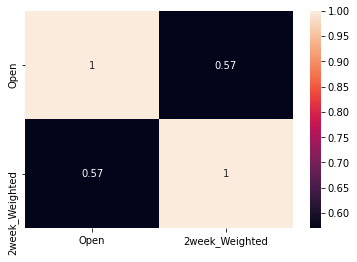

In [15]:
# target_data = df.drop(['Date' ], axis=1)
corrMatrix = df_scaled_training.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [16]:
trainX = []
trainY = []
n_future = 1   
n_past = 7

In [17]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [18]:
trainX


[array([[-1.70290961,  0.43021526],
        [-1.67983993, -0.09552471],
        [-1.67842854, -1.14700465],
        [-1.69698588, -2.49890743],
        [-1.69321426, -1.59763891],
        [-1.68076549, -0.75269967],
        [-1.66100465, -0.69637039]]),
 array([[-1.67983993e+00, -9.55247066e-02],
        [-1.67842854e+00, -1.14700465e+00],
        [-1.69698588e+00, -2.49890743e+00],
        [-1.69321426e+00, -1.59763891e+00],
        [-1.68076549e+00, -7.52699669e-01],
        [-1.66100465e+00, -6.96370386e-01],
        [-1.66903395e+00,  6.43788499e-05]]),
 array([[-1.67842854e+00, -1.14700465e+00],
        [-1.69698588e+00, -2.49890743e+00],
        [-1.69321426e+00, -1.59763891e+00],
        [-1.68076549e+00, -7.52699669e-01],
        [-1.66100465e+00, -6.96370386e-01],
        [-1.66903395e+00,  6.43788499e-05],
        [-1.66898763e+00,  3.59102859e-02]]),
 array([[-1.69698588e+00, -2.49890743e+00],
        [-1.69321426e+00, -1.59763891e+00],
        [-1.68076549e+00, -7.52699669e

In [19]:
trainY

[array([-1.66903395]),
 array([-1.66898763]),
 array([-1.65646949]),
 array([-1.64240099]),
 array([-1.6579272]),
 array([-1.66012541]),
 array([-1.68048778]),
 array([-1.71531205]),
 array([-1.70161369]),
 array([-1.71165613]),
 array([-1.72431323]),
 array([-1.72674284]),
 array([-1.73889084]),
 array([-1.6964074]),
 array([-1.67213467]),
 array([-1.68407433]),
 array([-1.6524432]),
 array([-1.63821269]),
 array([-1.59510468]),
 array([-1.54725316]),
 array([-1.56083583]),
 array([-1.59112472]),
 array([-1.57259042]),
 array([-1.51939365]),
 array([-1.52728421]),
 array([-1.537234]),
 array([-1.52781636]),
 array([-1.52270272]),
 array([-1.51347015]),
 array([-1.50284923]),
 array([-1.49181208]),
 array([-1.46244854]),
 array([-1.49167311]),
 array([-1.51189674]),
 array([-1.52901963]),
 array([-1.53255986]),
 array([-1.52413716]),
 array([-1.52758497]),
 array([-1.51307674]),
 array([-1.52441487]),
 array([-1.52709914]),
 array([-1.51414127]),
 array([-1.53066242]),
 array([-1.50842

In [20]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (1952, 7, 2).
trainY shape == (1952, 1).


In [21]:
model = Sequential()
model.add(GRU(120, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=False))
# model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 120)               44640     
_________________________________________________________________
dropout (Dropout)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 121       
Total params: 44,761
Trainable params: 44,761
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.3, verbose=1)

Epoch 1/10
86/86 [==============================] - 4s 21ms/step - loss: 0.2553 - val_loss: 0.0213
Epoch 2/10
86/86 [==============================] - 1s 10ms/step - loss: 0.0165 - val_loss: 0.0139
Epoch 3/10
86/86 [==============================] - 1s 9ms/step - loss: 0.0129 - val_loss: 0.0116
Epoch 4/10
86/86 [==============================] - 1s 9ms/step - loss: 0.0143 - val_loss: 0.0498
Epoch 5/10
86/86 [==============================] - 1s 9ms/step - loss: 0.0126 - val_loss: 0.0211
Epoch 6/10
86/86 [==============================] - 1s 10ms/step - loss: 0.0121 - val_loss: 0.0169
Epoch 7/10
86/86 [==============================] - 1s 9ms/step - loss: 0.0120 - val_loss: 0.0112
Epoch 8/10
86/86 [==============================] - 1s 10ms/step - loss: 0.0098 - val_loss: 0.0118
Epoch 9/10
86/86 [==============================] - 1s 8ms/step - loss: 0.0123 - val_loss: 0.0119
Epoch 10/10
86/86 [==============================] - 1s 9ms/step - loss: 0.0104 - val_loss: 0.0117


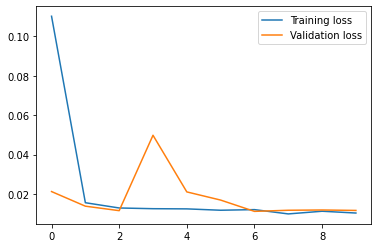

In [23]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [24]:

n_future=30
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()
forecast_past = model.predict(trainX)
forecast = model.predict(trainX[-n_future:]) #forecast 



In [25]:
forecast_copies_past = np.repeat(forecast_past, df_for_training.shape[1], axis=-1)
y_pred_past = scaler.inverse_transform(forecast_copies_past)[:,0]
len(y_pred_past)

1952

In [26]:
past_date = df['Date']


In [27]:
pre_past = pd.DataFrame(y_pred_past, columns = ['Open'])
past_date = df['Date']
Date = pd.to_datetime(past_date[7:].reset_index(drop=True))
pre_past['Date'] = Date
pre_past

,Open,Date
0,5366.663574,2012-08-17
1,5432.632812,2012-08-21
2,5431.948242,2012-08-22
3,5258.812012,2012-08-23
4,5479.570312,2012-08-24
...,...,...
1947,15159.437500,2021-01-22
1948,15196.568359,2021-01-25
1949,15180.711914,2021-01-27
1950,15086.840820,2021-01-28


In [28]:
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]
y_pred_future

array([13760.045 , 13824.733 , 13891.09  , 13957.666 , 13998.087 ,
       13918.046 , 13862.26  , 13881.162 , 13959.078 , 14064.356 ,
       14175.465 , 14261.58  , 14372.7705, 14447.607 , 14540.882 ,
       14620.253 , 14677.676 , 14780.187 , 14875.078 , 14991.298 ,
       15067.57  , 15121.238 , 15115.431 , 15068.139 , 15074.503 ,
       15159.4375, 15196.568 , 15180.712 , 15086.841 , 14863.251 ],
      dtype=float32)

In [29]:
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())
forecast_dates

[datetime.date(2021, 1, 29),
 datetime.date(2021, 1, 30),
 datetime.date(2021, 1, 31),
 datetime.date(2021, 2, 1),
 datetime.date(2021, 2, 2),
 datetime.date(2021, 2, 3),
 datetime.date(2021, 2, 4),
 datetime.date(2021, 2, 5),
 datetime.date(2021, 2, 6),
 datetime.date(2021, 2, 7),
 datetime.date(2021, 2, 8),
 datetime.date(2021, 2, 9),
 datetime.date(2021, 2, 10),
 datetime.date(2021, 2, 11),
 datetime.date(2021, 2, 12),
 datetime.date(2021, 2, 13),
 datetime.date(2021, 2, 14),
 datetime.date(2021, 2, 15),
 datetime.date(2021, 2, 16),
 datetime.date(2021, 2, 17),
 datetime.date(2021, 2, 18),
 datetime.date(2021, 2, 19),
 datetime.date(2021, 2, 20),
 datetime.date(2021, 2, 21),
 datetime.date(2021, 2, 22),
 datetime.date(2021, 2, 23),
 datetime.date(2021, 2, 24),
 datetime.date(2021, 2, 25),
 datetime.date(2021, 2, 26),
 datetime.date(2021, 2, 27)]

In [30]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])
df_forecast.to_csv('LSTM_14.csv')
df_forecast

,Date,Open
0,2021-01-29,13760.044922
1,2021-01-30,13824.733398
2,2021-01-31,13891.089844
3,2021-02-01,13957.666016
4,2021-02-02,13998.086914
5,2021-02-03,13918.045898
6,2021-02-04,13862.259766
7,2021-02-05,13881.162109
8,2021-02-06,13959.078125
9,2021-02-07,14064.356445


In [31]:



original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

original

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Open
1783,2020-05-04,9533.500000
1784,2020-05-05,9429.400391
1785,2020-05-06,9226.799805
1786,2020-05-07,9234.049805
1787,2020-05-08,9376.950195
...,...,...
1968,2021-01-22,14583.400391
1969,2021-01-25,14477.799805
1970,2021-01-27,14237.950195
1971,2021-01-28,13810.400391


In [32]:
past = pre_past.loc[pre_past['Date'] >= '2020-5-1']

past

,Open,Date
1764,9438.203125,2020-05-04
1765,9484.791992,2020-05-05
1766,9489.400391,2020-05-06
1767,9424.027344,2020-05-07
1768,9363.581055,2020-05-08
...,...,...
1947,15159.437500,2021-01-22
1948,15196.568359,2021-01-25
1949,15180.711914,2021-01-27
1950,15086.840820,2021-01-28


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

Text(0.5, 1.0, 'GRU sent 7day window 2 week lagged scores')

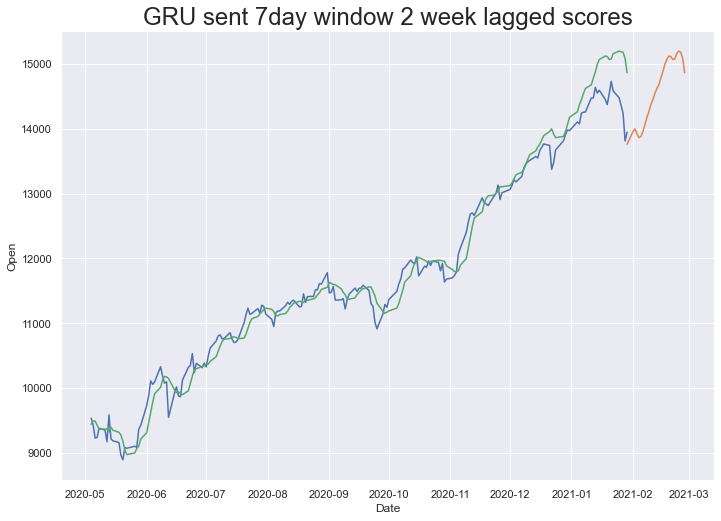

In [33]:
#fig, ax = plt.subplots(figsize = ( 5 , 3 ))
sns.set( rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])
sns.lineplot(past['Date'], past['Open'])
plt.title("GRU sent 7day window 2 week lagged scores" , size =24)